URL的基本结构: `scheme://host:port/path?query`

URL请求数据的时候`/path`中的`/`就是代表下图中的`webapp`目录, 也就是根目录, 所以所有的资源(jsp files, images...)应该放到这个目录下, 与`webapp`并列的是`java`, 这个目录下放的是负责处理逻辑的servlet. 

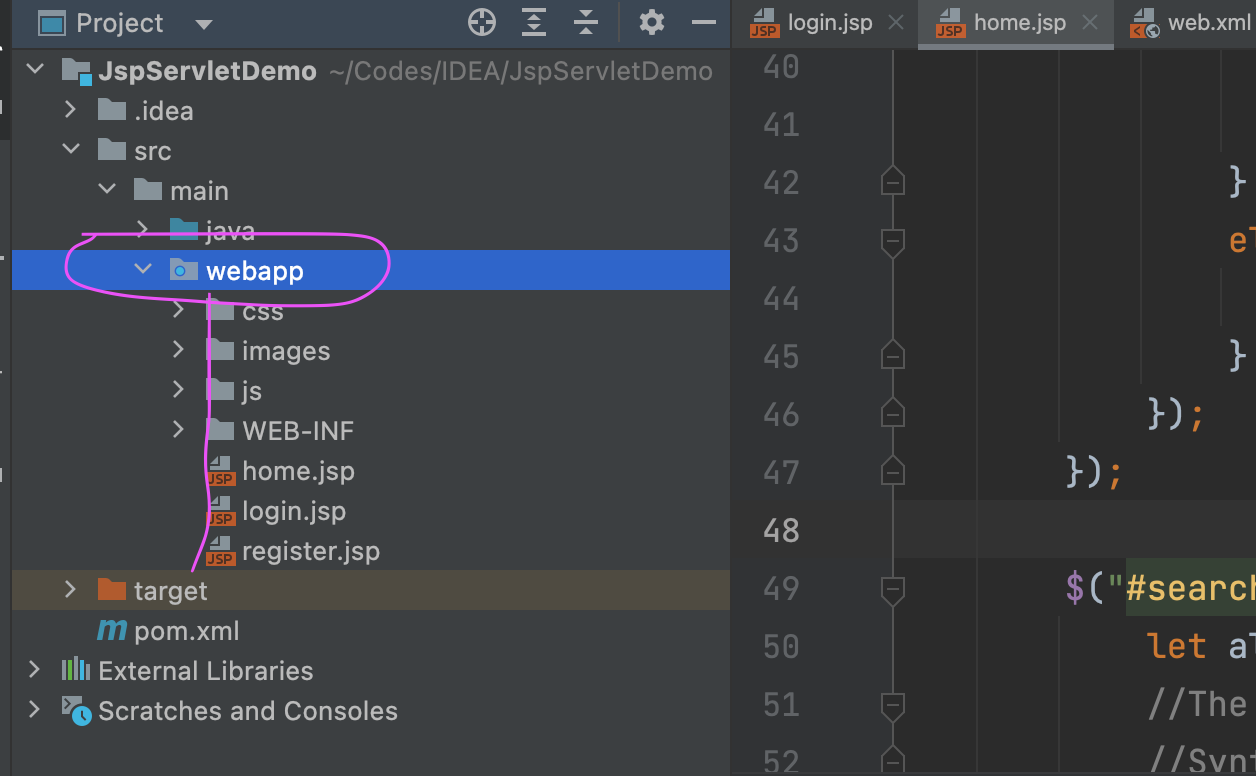

比如我想访问images里面的一个图片, 我的url只需这么写`http://localhost:8080/images/head.jpg`, 同理如果我想访问`register.jsp`页面, 那我就直接输入`http://localhost:8080/register.jsp`. 

那在jsp文件里, 怎么实现页面跳转呢? 比如我在登陆页面, 那我怎么通过一个按钮或者超链接来实现点击一下进入注册页面呢?

很简单, 直接写目的页面相对写此时所在页面的路径即可, e.g.,

```jsp
<%@ page contentType="text/html;charset=UTF-8" %>
<html>
<head>
...
</head>

<body>
    <div id="content">
        <form method="post" id="loginForm" action="${pageContext.request.contextPath}/LoginServletName">
            <div id="login">
                ...
                <a href = "register.jsp" style="color: aquamarine;">Register now</a>
                <a href = "images/head.jpg" style="color: aquamarine;">Watch Image</a>
                ...
            </div>
        </form>
    </div>
</body>
</html>
```

----

> The deployment descriptor is a file named `web.xml`. It resides in the app's WAR under the `WEB-INF/` directory. The file is an XML file whose **root element** is `web-app`. 也就是说在web.xml里面, `/`就是代表`webapp`. 

## 1. 默认页面设置
---
`web.xml`
```xml
<?xml version="1.0" encoding="UTF-8"?>
<web-app xmlns="http://xmlns.jcp.org/xml/ns/javaee"
         xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
         xsi:schemaLocation="http://xmlns.jcp.org/xml/ns/javaee http://xmlns.jcp.org/xml/ns/javaee/web-app_4_0.xsd"
         version="4.0">

    <welcome-file-list>
        <welcome-file>/index.jsp</welcome-file>
    </welcome-file-list>
</web-app>
```

有了下面这段, 你可以不用输入路径直接访问指定页面(`http://localhost:8080`):

```xml
<welcome-file-list>
    <welcome-file>/index.jsp</welcome-file>
</welcome-file-list>
```

## 2. 匹配Servlet
---

那我怎么匹配Servlet呢(Servlet是负责处理http请求的逻辑, 接受返回http由tomcat负责), 如果html想和后端交互就需要发送http request, 基本就得使用post, get这种方法, 而这些方法就需要配合form或者按钮等来激活(调用js方法, 从js发出http请求), 所以我们通过form的action选项来指定我们要去的路径, 然后tomcat看到这个路径就会在`web.xml`匹配`url-pattern`, 进而找到目的Servlet, 举个例子:

`web.xml`:
```
<?xml version="1.0" encoding="UTF-8"?>
<web-app xmlns="http://xmlns.jcp.org/xml/ns/javaee"
         xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
         xsi:schemaLocation="http://xmlns.jcp.org/xml/ns/javaee http://xmlns.jcp.org/xml/ns/javaee/web-app_4_0.xsd"
         version="4.0">

    <welcome-file-list>
        <welcome-file>/index.jsp</welcome-file>
    </welcome-file-list>

    <servlet>
        <servlet-name>search-user</servlet-name>
        <servlet-class>com.jsp.SearchServlet</servlet-class>
    </servlet>
    <servlet-mapping>
        <servlet-name>search-user</servlet-name>
        <url-pattern>/search</url-pattern>
    </servlet-mapping>

    <servlet>
        <servlet-name>blue-team</servlet-name>
        <servlet-class>com.jsp.TeamBlueServlet</servlet-class>
    </servlet>
    <servlet-mapping>
        <servlet-name>blue-team</servlet-name>
        <url-pattern>/blue/*</url-pattern>
    </servlet-mapping>
</web-app>
```

`index.jsp`:

```html
<%@ page contentType="text/html;charset=UTF-8" language="java" %>
<html>
<head>
    <title>Hello World</title>
    <script type="text/javascript">
        function verify() {
            document.getElementById("loginForm").submit();
        }

        function verify2() {
            document.getElementById("loginForm2").submit();
        }
    </script>
</head>

<body>
<div id="content">
    <form method="post" id="loginForm" action="${pageContext.request.contextPath}/search">
        <div id="login">
            <label for="username"></label><input type="text" id="username" name="username" placeholder="username"/>
            <label for="password"></label><input type="password" id="password" name="password" placeholder="password"/>
            <button type="button" onclick="verify()" style="margin-right: 85px;">Login</button>
        </div>
    </form>

    <form method="post" id="loginForm2" action="${pageContext.request.contextPath}/blue/">
        <div id="login2">
            <label for="username"></label><input type="text" id="username2" name="username" placeholder="username"/>
            <label for="password"></label><input type="password" id="password2" name="password" placeholder="password"/>
            <button type="button" onclick="verify2()" style="margin-right: 85px;">Login2</button>
        </div>
    </form>
</div>
</body>
</html>
```



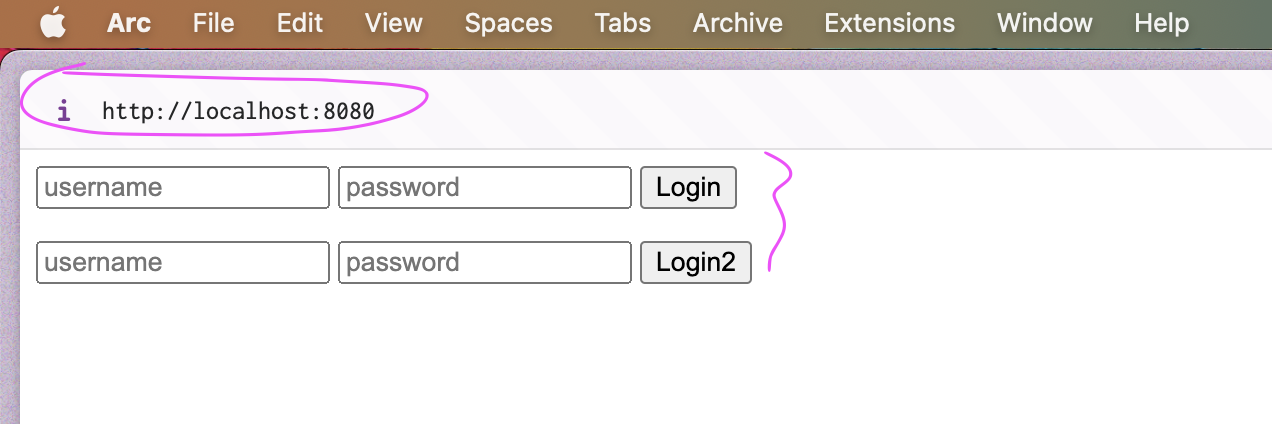

这时候如果我点击按钮Login, 那就会激活form1的action, 也就是目的地是`${pageContext.request.contextPath}/search`, 

然后在`web.xml`里, 对应`/search`的servlet是`com.jsp.SearchServlet`, 所以这个时候这个servlet的post方法就会被调用, 

```xml
   <servlet-mapping>
        <servlet-name>search-user</servlet-name>
        <url-pattern>/search</url-pattern>
    </servlet-mapping>
```

所以理解匹配规则, 其实就是这段代码里的`<url-pattern>/search</url-pattern>`, 我们知道默认在浏览器输入一个网址,其实就是发送get方法, 其实`/search`代表的意思是只要是访问`http://localhost:8080/search`, 那都会转交给`<servlet-class>com.jsp.SearchServlet</servlet-class>`中的servlet来处理, 做个测试, 但是我没在com.jsp.SearchServlet里实现doGet方法, 只实现了doPost方法, 

现在我在浏览器直接输入网址`http://localhost:8080/search`, 注意我没有点击按钮Login哦, 



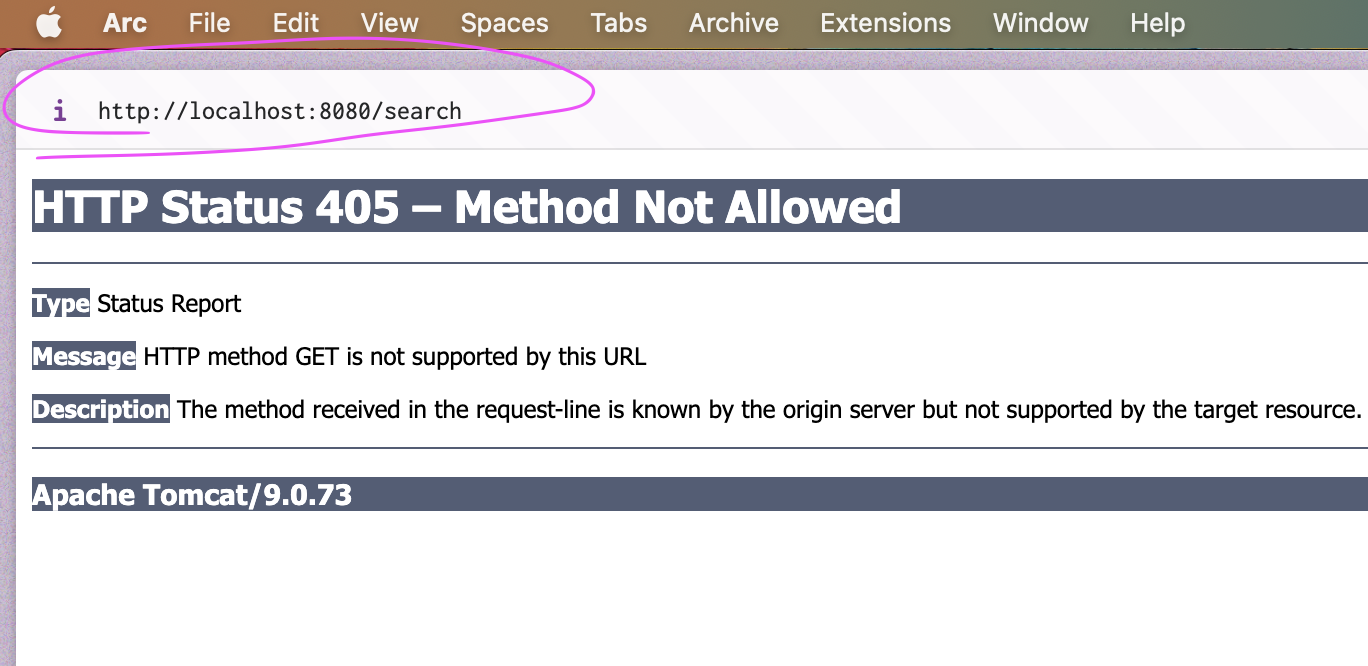

可以看到其实是转到了Servlet, 只不过我们的Servlet没有实现对应的doGet方法而已, 现在实现一下, 试试:

```java
public void doGet(HttpServletRequest request, HttpServletResponse response) throws IOException {
        PrintWriter out = response.getWriter();
        out.println("<script type=\"text/javascript\">");
        out.println("location='/a.jsp';");
        out.println("</script>");
}
```

其中`"location='/a.jsp';"`的意思是跳转到根目录下的`a.jsp`页面, 还记得根目录是谁吗? 当然是`webapp`咯, 不要忘. 

然后我再输入网址`http://localhost:8080/search`的时候, 都会自动跳转到`a.jsp`, 所以就是这么回事.

所以继续看上面的`web.xml`中的bule-team, 然后那个url-pattern的意思是, 只要是`http://localhost:8080/blue/`下的, 都会转发给`com.jsp.TeamBlueServlet`, 比如`http://localhost:8080/blue/john.jsp`或者`http://localhost:8080/blue/profile/b.jsp`等等, 如果我们在浏览器输入这些网址吗那就会默认调用该Servelt的`doGet()`方法. 但注意, `/blue/profile/b.jsp`代表的是`webapp/blue/profile/b.jsp`, 如果只是为了访问页面, 与其每次让tomcat转发给Servlet, 直接在`webapp`下创建`blue/profile/b.jsp`不是更好吗? 输入`http://localhost:8080/blue/profile/b.jsp`, 直接访问对应文件, 当然这中间经历了`b.jsp`被编译成servlet然后翻译成html, 再由tomcat返回给客户端的过程. 

`com.jsp.SearchServlet.java`:
```java
public class SearchServlet extends HttpServlet {
    public void doPost(HttpServletRequest request, HttpServletResponse response) throws IOException {
        PrintWriter out = response.getWriter();
        out.println("<script type=\"text/javascript\">");
        out.println("alert('User does not exist!');");
        out.println("location='/a.jsp';");
        out.println("</script>");
    }

    public void doGet(HttpServletRequest request, HttpServletResponse response) throws IOException {
        PrintWriter out = response.getWriter();
        out.println("<script type=\"text/javascript\">");
        out.println("location='/a.jsp';");
        out.println("</script>");
    }
}
```


## 3. 记录一个bug
---

Tomcat接收到http请求(post/get...)后, 会对该请求进行map, 即决定把这个请求转给我们自定义的某个Servlet去处理. 然后呢我写的登录逻辑, 就是每次点击登录按钮的时候, 都会把请求发送到一个Servlet, 但是每次到这个点的时候, 就会报错说找不到HttpServlet(我们自定义的Servlet都是继承了HttpServlet了的). 如下图:



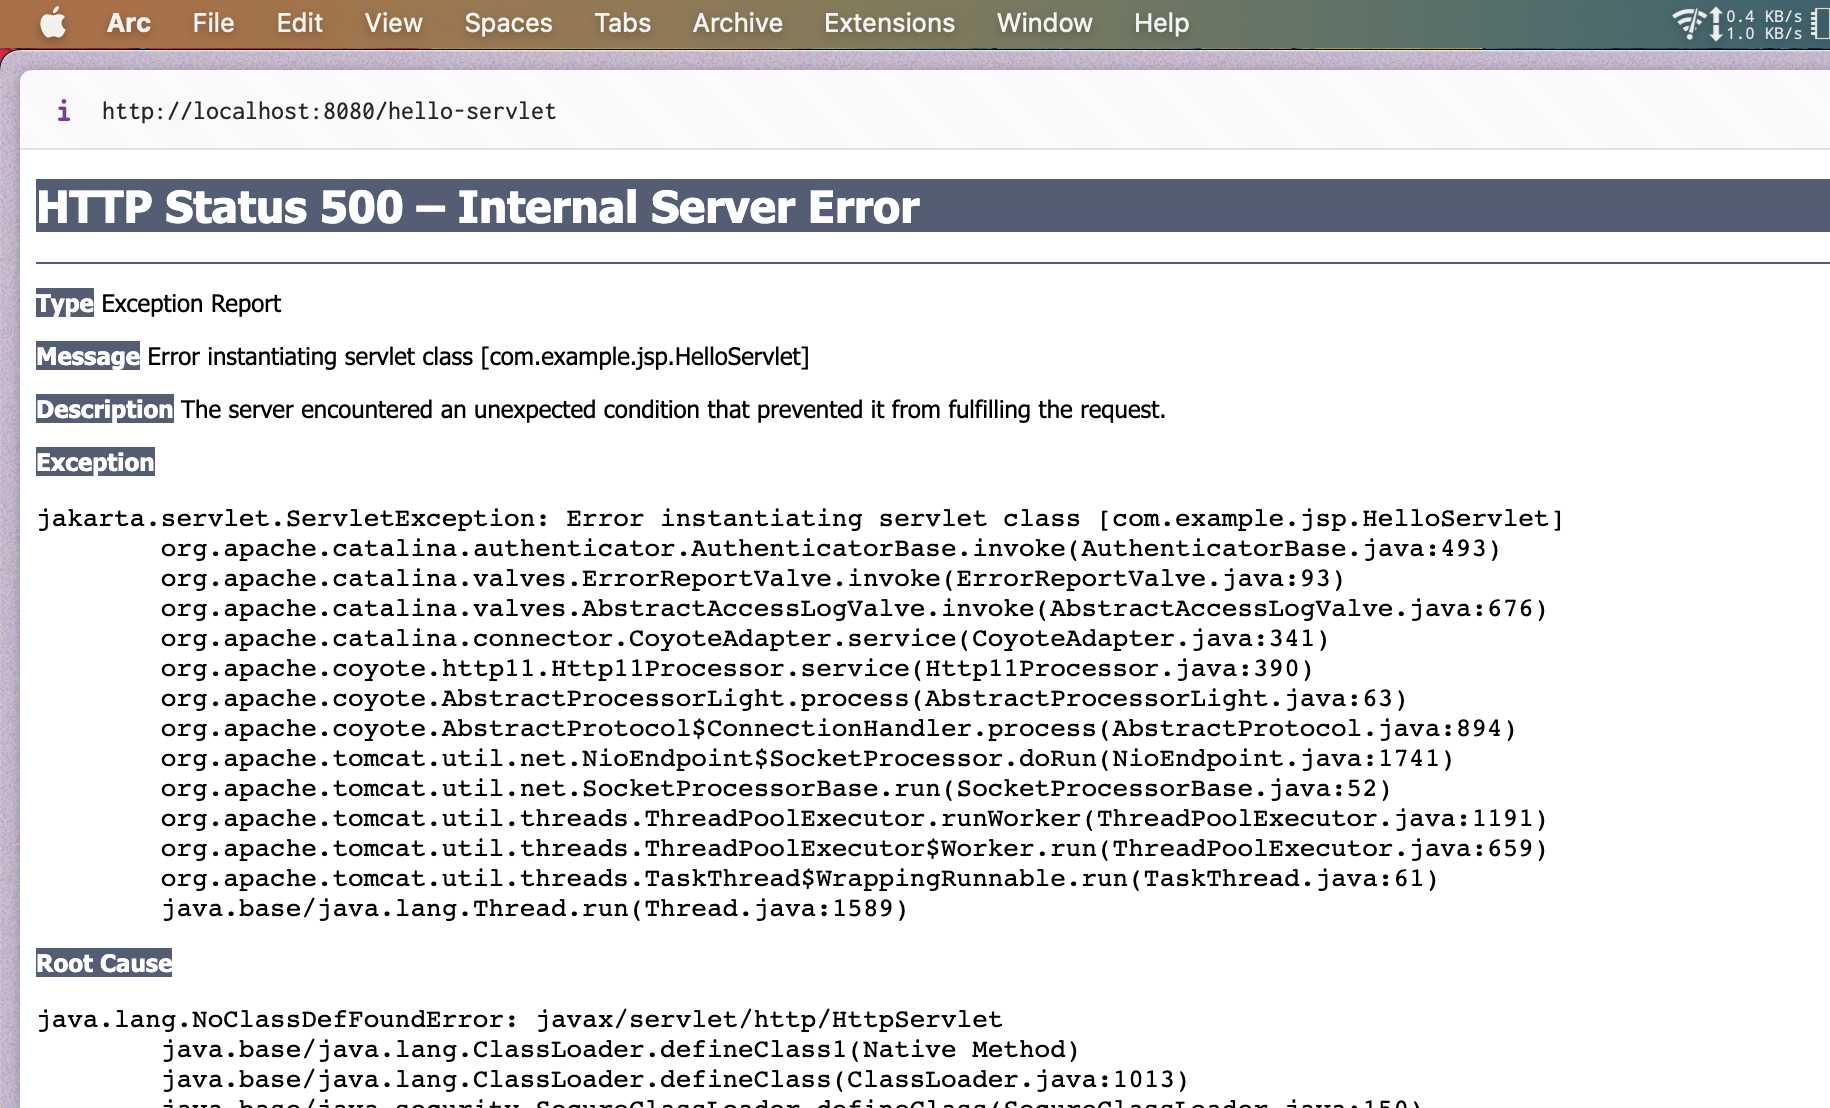

怎么解决呢?

创建项目的时候发现IDEA上的Servlet版本是4.0的, 而我用的Tomcat是10.0(这个版本只支持Servlet 5.0), 所以删掉这个Tomcat, 重新下载个9.0版本的就可以了. 

https://tomcat.apache.org/download-90.cgi

原文: https://blog.csdn.net/qq_43682690/article/details/109364514

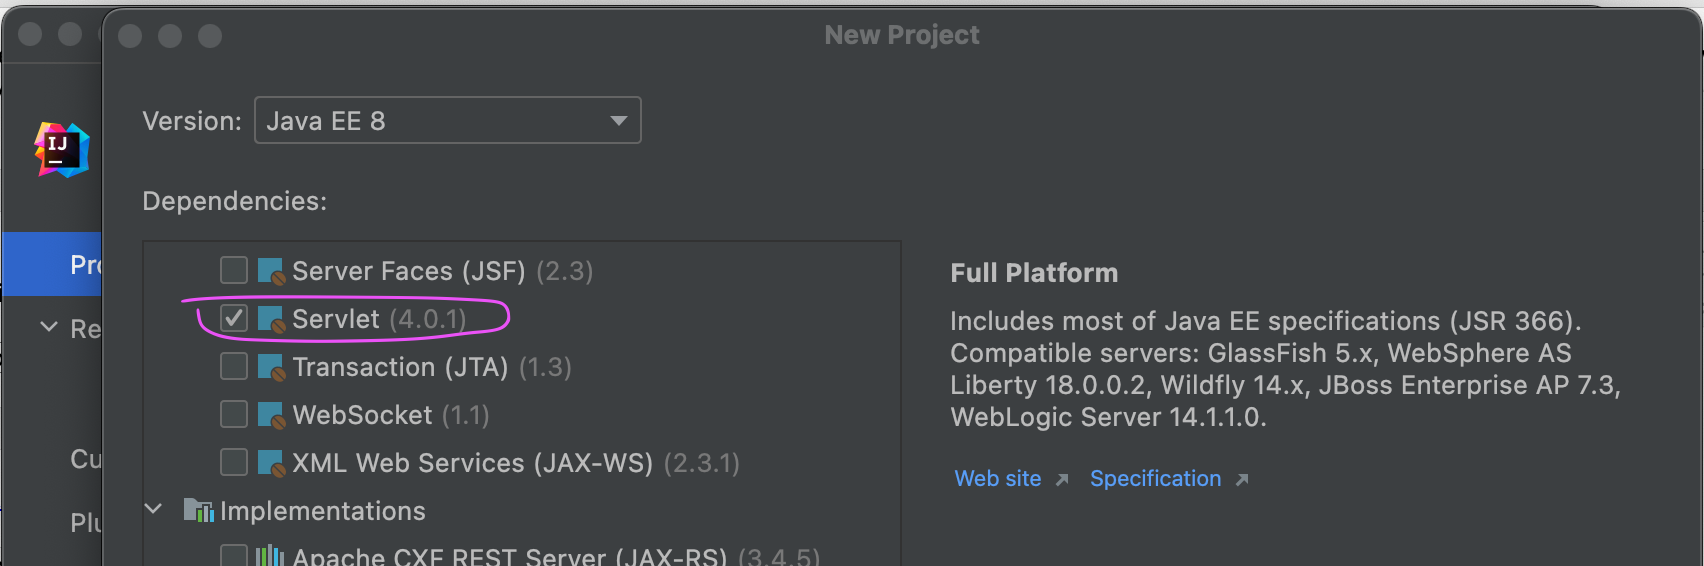

## 4. 配置截图

新建Java Enterprise项目的时候一般, 这么设置就好, 别忘在`web.xml`里写上:

```
<welcome-file-list>
    <welcome-file>/index.jsp</welcome-file>
</welcome-file-list>
```

也别忘了`/`代表的是`webapp`目录

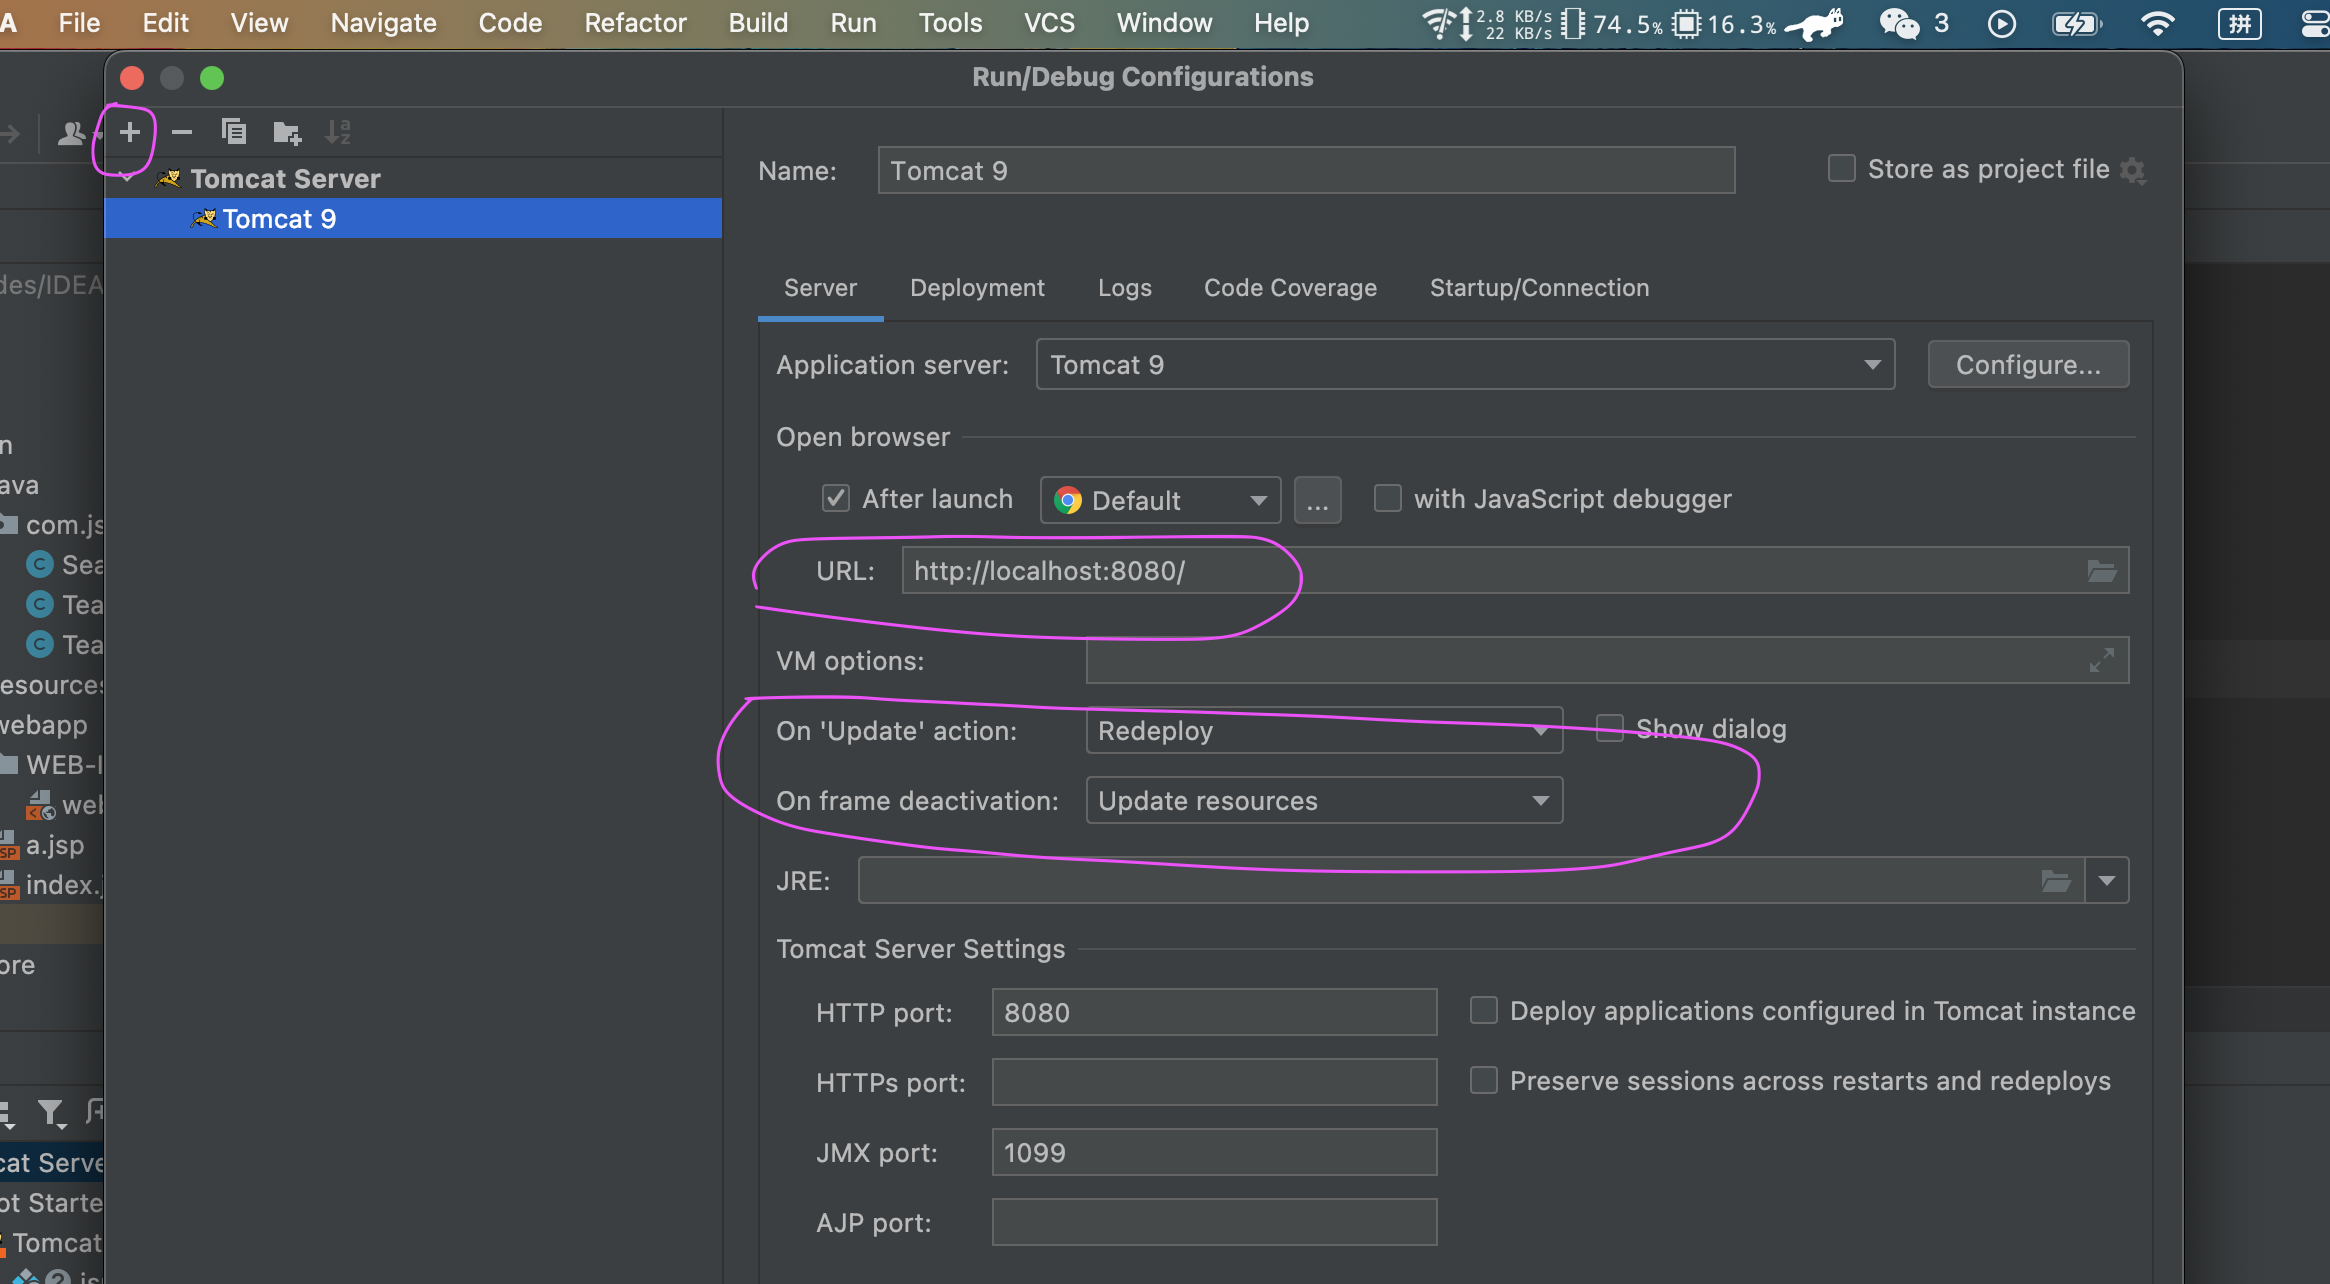

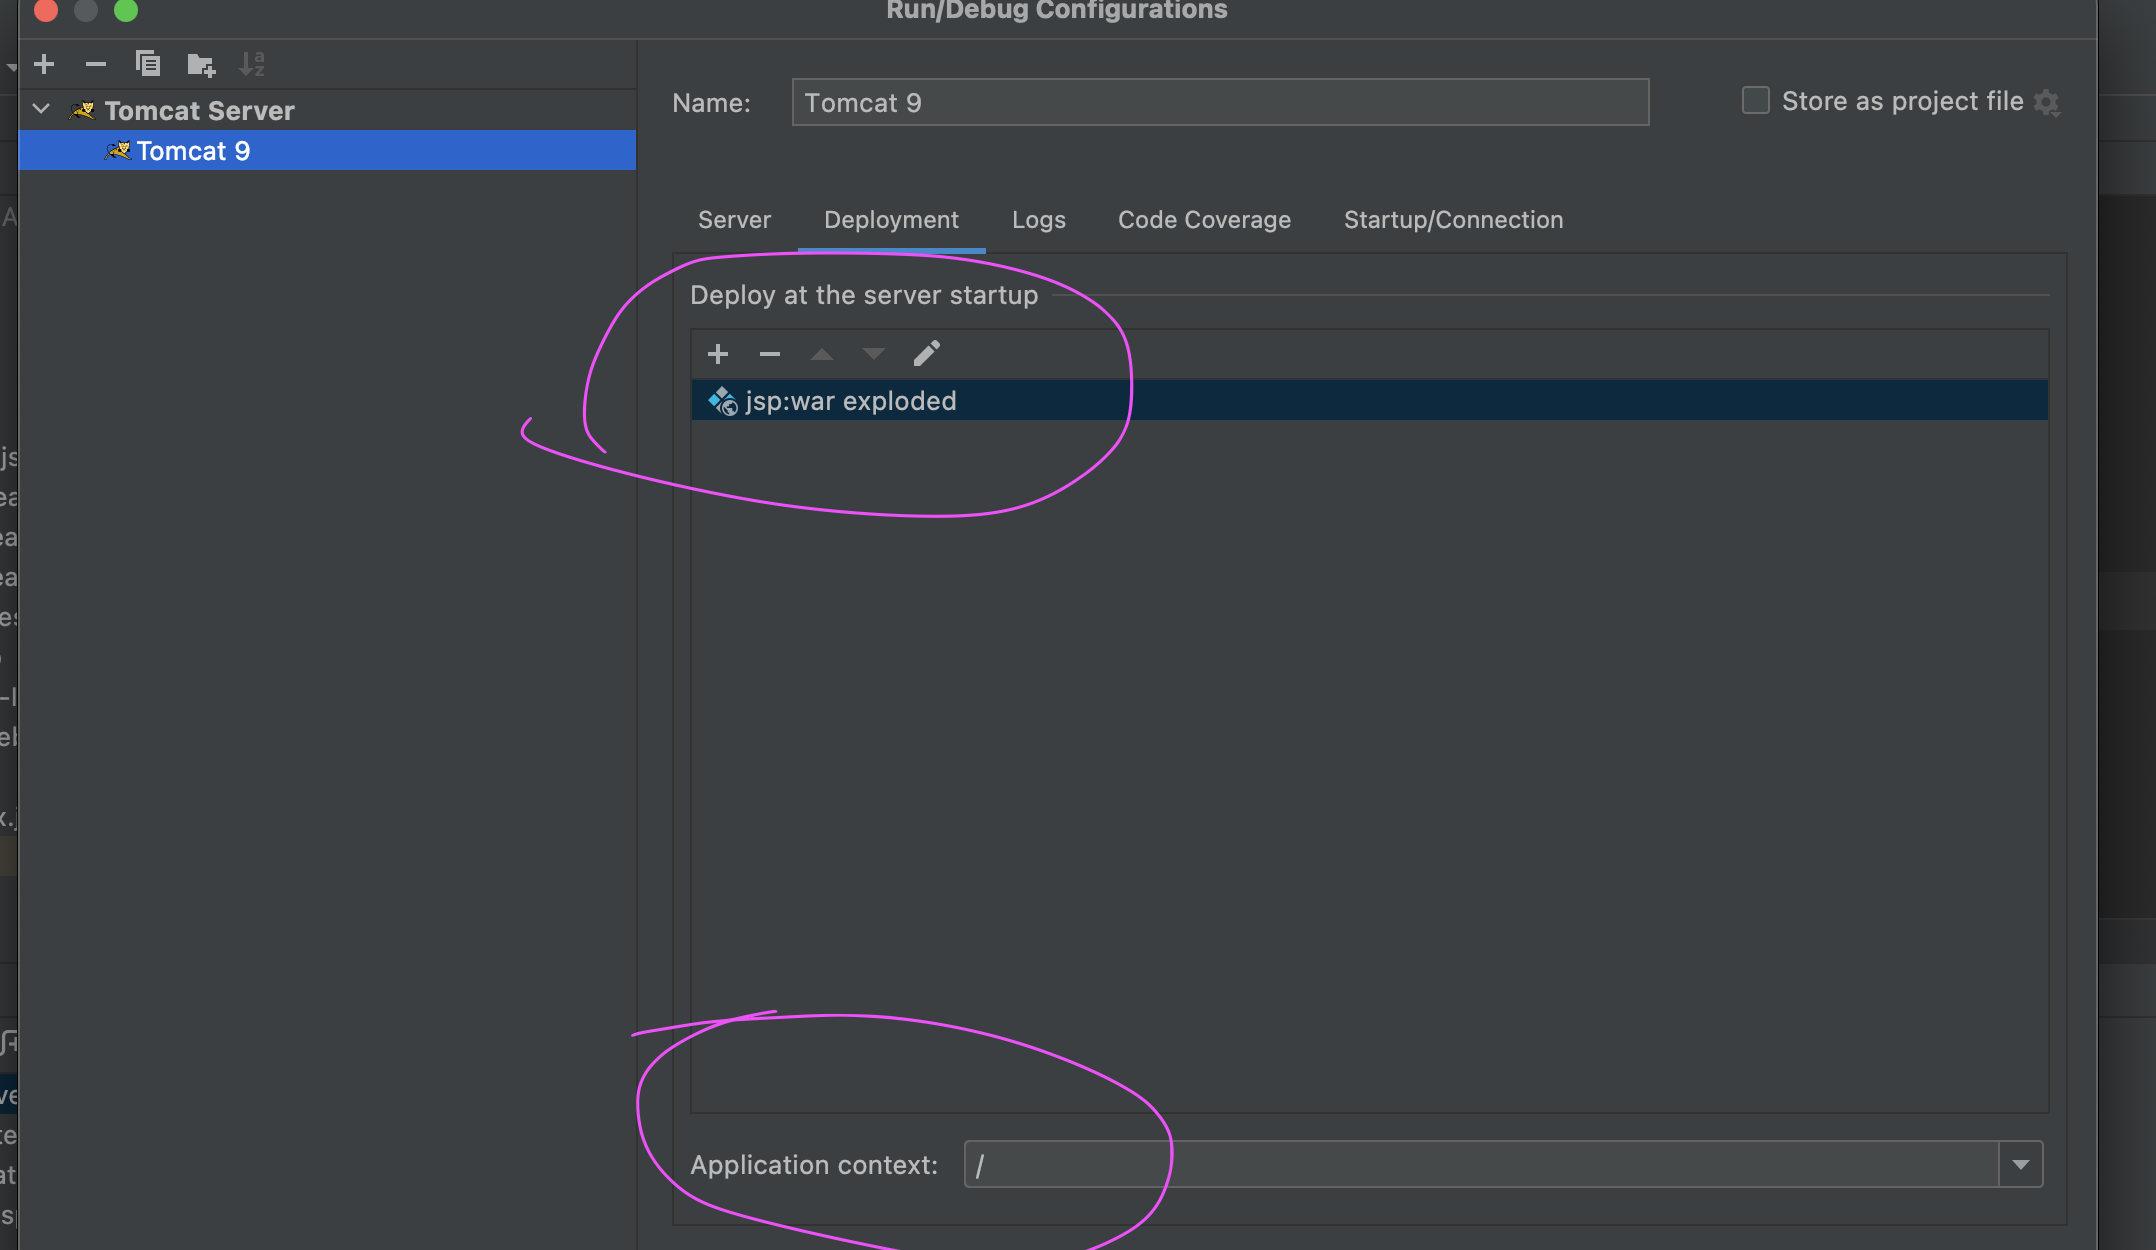